In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor as lgb
from sklearn.preprocessing import LabelEncoder
from linearmodels import RandomEffects
import scipy.stats as stats
df = pd.read_csv('final_data.csv')

In [16]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S')
df['year'] = df['publish_time'].dt.strftime('%Y')
df['hour'] = df['publish_time'].dt.strftime('%H')
df['month'] = df['publish_time'].dt.strftime('%m')
df['ymd'] = df['publish_time'].dt.strftime('%Y-%m-%d')

In [17]:
df1 = df.loc[df['nickname'] == '北念故兮']
df2 = df.loc[ df['nickname'] == '佳学基因']
df3 = df.loc[df['nickname'] == '西安交大一附院帕金森中心陈伟']

In [18]:
count1 = df1.groupby('publish_time').size().reset_index(name='counts')
count1['ts1'] = count1['publish_time'].shift(1)
count1['hour'] = (count1['publish_time'] - count1['ts1']).dt.total_seconds() / 60
count1['hour'] = np.round(count1['hour'], 0)
count1

,publish_time,counts,ts1,hour
0,2022-03-03 13:23:31+08:00,1,NaT,NaN
1,2022-03-03 13:23:44+08:00,1,2022-03-03 13:23:31+08:00,0.0
2,2022-03-03 13:24:07+08:00,1,2022-03-03 13:23:44+08:00,0.0
3,2022-03-03 13:24:46+08:00,1,2022-03-03 13:24:07+08:00,1.0
4,2022-03-03 13:25:02+08:00,1,2022-03-03 13:24:46+08:00,0.0
...,...,...,...,...
1652,2023-03-22 08:50:46+08:00,1,2023-03-22 08:50:39+08:00,0.0
1653,2023-03-23 08:45:24+08:00,1,2023-03-22 08:50:46+08:00,1435.0
1654,2023-03-23 08:45:32+08:00,1,2023-03-23 08:45:24+08:00,0.0
1655,2023-03-23 08:45:39+08:00,1,2023-03-23 08:45:32+08:00,0.0


In [19]:
count2 = df2.groupby('publish_time').size().reset_index(name='counts')
count2['ts1'] = count2['publish_time'].shift(1)
count2['hour'] = (count2['publish_time'] - count2['ts1']).dt.total_seconds() / 60
count2['hour'] = np.round(count2['hour'], 0)
count2

,publish_time,counts,ts1,hour
0,2020-08-18 16:48:04+08:00,1,NaT,NaN
1,2020-08-18 16:48:26+08:00,1,2020-08-18 16:48:04+08:00,0.0
2,2020-08-18 16:48:40+08:00,1,2020-08-18 16:48:26+08:00,0.0
3,2020-08-18 16:49:13+08:00,1,2020-08-18 16:48:40+08:00,1.0
4,2020-08-18 16:49:35+08:00,1,2020-08-18 16:49:13+08:00,0.0
...,...,...,...,...
1469,2022-09-22 13:42:57+08:00,1,2022-09-22 13:42:42+08:00,0.0
1470,2022-09-22 13:43:11+08:00,1,2022-09-22 13:42:57+08:00,0.0
1471,2022-09-22 13:43:25+08:00,1,2022-09-22 13:43:11+08:00,0.0
1472,2022-09-22 13:43:41+08:00,1,2022-09-22 13:43:25+08:00,0.0


In [20]:
count3 = df3.groupby('publish_time').size().reset_index(name='counts')
count3['ts1'] = count3['publish_time'].shift(1)
count3['hour'] = (count3['publish_time'] - count3['ts1']).dt.total_seconds() / 60
count3['hour'] = np.round(count3['hour'], 0)
count3

,publish_time,counts,ts1,hour
0,2020-08-20 16:07:05+08:00,1,NaT,NaN
1,2020-08-20 16:11:27+08:00,1,2020-08-20 16:07:05+08:00,4.0
2,2020-08-20 16:15:20+08:00,1,2020-08-20 16:11:27+08:00,4.0
3,2020-08-25 09:10:07+08:00,1,2020-08-20 16:15:20+08:00,6775.0
4,2020-08-25 09:12:11+08:00,1,2020-08-25 09:10:07+08:00,2.0
...,...,...,...,...
921,2023-03-15 10:54:01+08:00,1,2023-03-14 09:48:27+08:00,1506.0
922,2023-03-16 10:37:08+08:00,1,2023-03-15 10:54:01+08:00,1423.0
923,2023-03-16 15:22:29+08:00,1,2023-03-16 10:37:08+08:00,285.0
924,2023-03-21 08:48:00+08:00,1,2023-03-16 15:22:29+08:00,6806.0


In [21]:
diff1 = count1.groupby('hour').size().reset_index(name='counts')
diff1['ratio'] = diff1['counts']/diff1['counts'].sum()
diff1
#中医营销号

,hour,counts,ratio
0,0.0,884,0.533816
1,1.0,134,0.080918
2,2.0,36,0.021739
3,3.0,8,0.004831
4,4.0,1,0.000604
...,...,...,...
347,4323.0,1,0.000604
348,4340.0,1,0.000604
349,4816.0,1,0.000604
350,5773.0,1,0.000604


In [22]:
diff2 = count2.groupby('hour').size().reset_index(name='counts')
diff2['ratio'] = diff2['counts']/diff2['counts'].sum()
diff2
#医疗公司

,hour,counts,ratio
0,0.0,1096,0.744060
1,1.0,222,0.150713
2,2.0,43,0.029192
3,3.0,8,0.005431
4,4.0,4,0.002716
...,...,...,...
77,94820.0,1,0.000679
78,96017.0,1,0.000679
79,131952.0,1,0.000679
80,223042.0,1,0.000679


In [23]:
diff3= count3.groupby('hour').size().reset_index(name='counts')
diff3['ratio'] = diff3['counts']/diff3['counts'].sum()
diff3
#医生

,hour,counts,ratio
0,0.0,7,0.007568
1,1.0,36,0.038919
2,2.0,93,0.100541
3,3.0,78,0.084324
4,4.0,37,0.040000
...,...,...,...
523,14459.0,1,0.001081
524,14468.0,1,0.001081
525,15390.0,1,0.001081
526,15747.0,1,0.001081


In [24]:
diff1.to_csv('data/中医营销号数据.csv')
diff2.to_csv('data/医疗公司.csv')
diff3.to_csv('data/医生.csv')

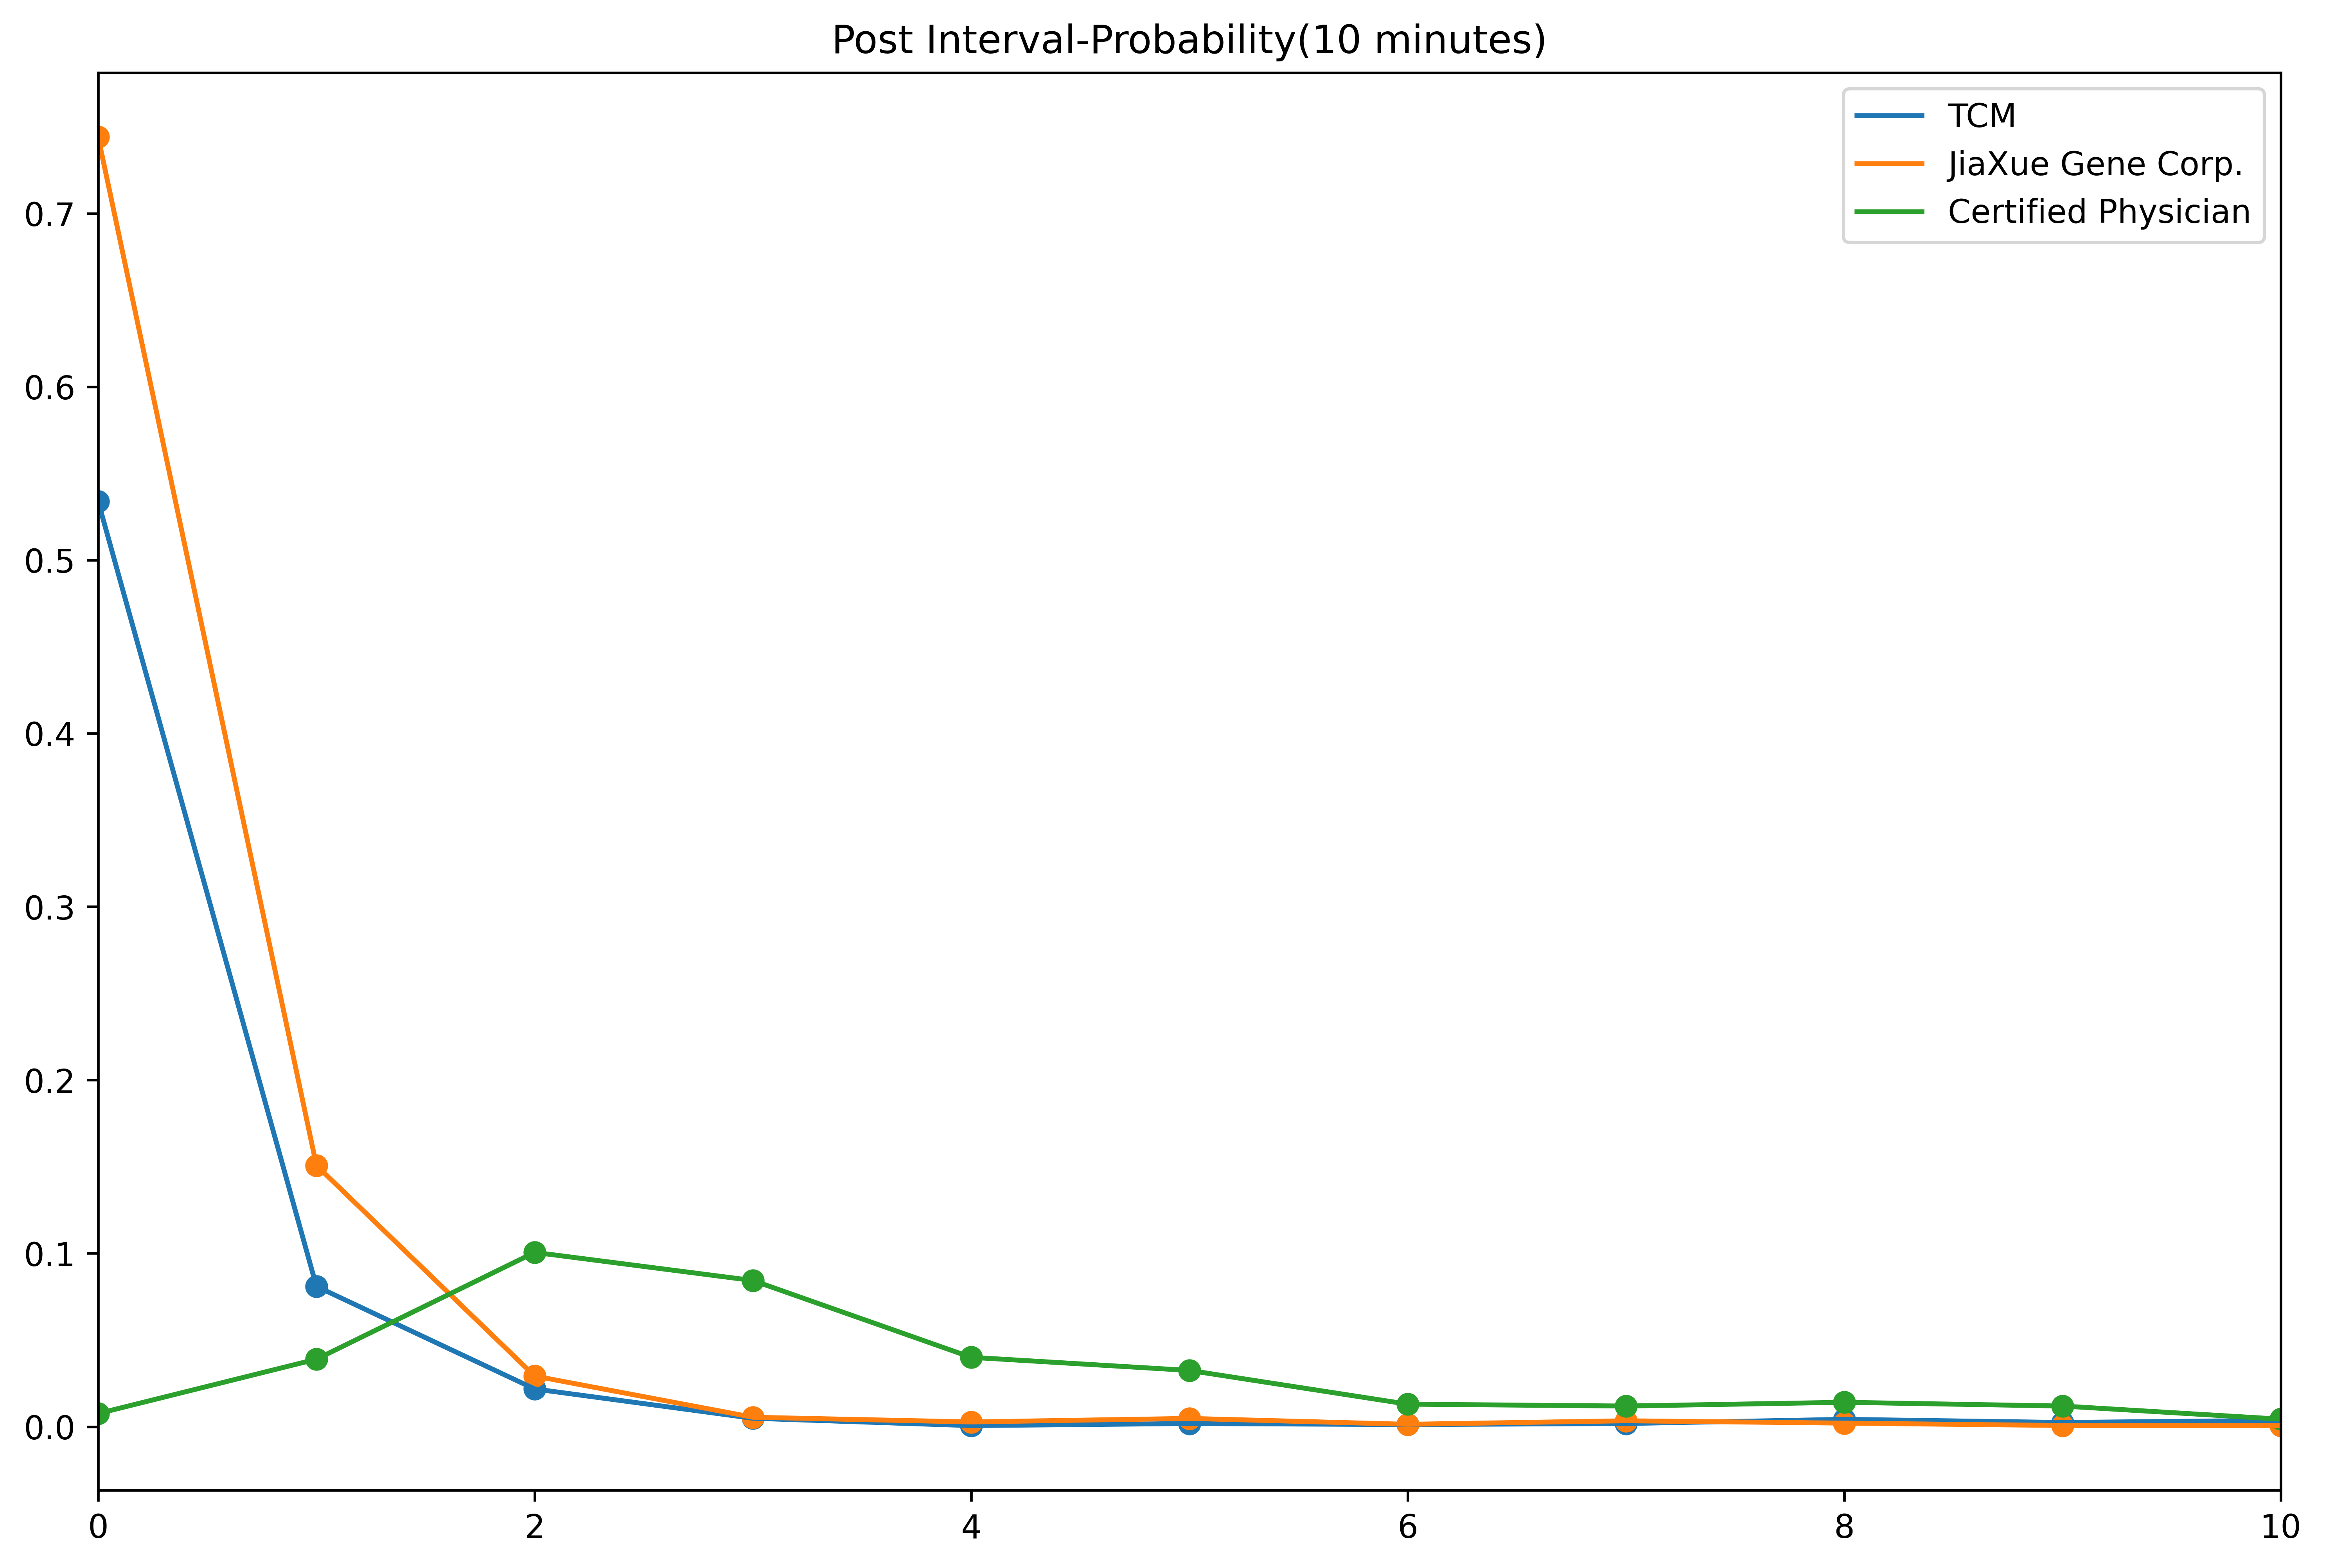

In [26]:
plt.figure(figsize=(12,8),dpi=600)
plt.xlim(0,10)
plt.title('Post Interval-Probability(10 minutes)')
plt.plot(diff1['hour'],diff1['ratio'],label = 'TCM')
plt.scatter(diff1['hour'],diff1['ratio'])
plt.plot(diff2['hour'],diff2['ratio'],label = 'JiaXue Gene Corp.')
plt.scatter(diff2['hour'],diff2['ratio'])
plt.plot(diff3['hour'],diff3['ratio'],label = 'Certified Physician')
plt.scatter(diff3['hour'],diff3['ratio'])
plt.legend()
plt.show()

In [27]:
tmp1 = diff1.loc[diff1['hour']<=10]
tmp1['ratio'] = tmp1['counts']/tmp1['counts'].sum()
tmp2 = diff2.loc[diff2['hour']<=10]
tmp2['ratio'] = tmp2['counts']/tmp2['counts'].sum()
tmp3 = diff3.loc[diff3['hour']<=10]
tmp3['ratio'] = tmp3['counts']/tmp3['counts'].sum()

C:\Users\seanx\AppData\Local\Temp\ipykernel_4200\2776213802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1['ratio'] = tmp1['counts']/tmp1['counts'].sum()
C:\Users\seanx\AppData\Local\Temp\ipykernel_4200\2776213802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp2['ratio'] = tmp2['counts']/tmp2['counts'].sum()
C:\Users\seanx\AppData\Local\Temp\ipykernel_4200\2776213802.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [29]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt

def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

data = tmp1['ratio']
(shape,loc, scale) = s.weibull_min.fit(data, floc=0)
                    
print (shape,loc, scale,'\n')

data = tmp2['ratio']
(shape,loc, scale) = s.weibull_min.fit(data, floc=0)
print (shape,loc, scale,'\n')

data = tmp3['ratio']
(shape,loc, scale) = s.weibull_min.fit(data, floc=0)
print (shape,loc, scale)

0.4481096651625388 0 0.026401141831609604 

0.41438102957640055 0 0.022162811003661267 

1.1130329842373607 0 0.0949261083990359


In [35]:
from scipy import stats
lst = [tmp1['ratio'],tmp2['ratio'],tmp3['ratio']]
args = [(0.45,0,0.026401141831609604),(0.4,0,0.022162811003661267),(1.5,0,0.0949261083990359)]
for i in range(1,4):
    kstest_result = stats.kstest(lst[i-1], 'weibull_min', args=args[i-1])
    print("\nKS Test：")
    print("D-statistic =", kstest_result.statistic)
    print("pvalue =", kstest_result.pvalue)



Kolmogorov-Smirnov拟合优度检验结果：
统计量(D) = 0.2970151500075434
p值 = 0.23492243725709427

Kolmogorov-Smirnov拟合优度检验结果：
统计量(D) = 0.2855974639071134
p值 = 0.2747554468503338

Kolmogorov-Smirnov拟合优度检验结果：
统计量(D) = 0.3127150216794414
p值 = 0.1873004432641786


In [ ]:
import numpy as np
from scipy.stats import weibull_min
from scipy.optimize import minimize
def weibull_likelihood(params):
    shape, loc, scale = params
    return -np.sum(np.log(weibull_min.pdf(tmp3['counts'], shape, loc=loc, scale=scale)))

# 初始猜测参数值
initial_guess = [1, 0, 1]

# 最大似然估计
result = minimize(weibull_likelihood, initial_guess, method='BFGS')
shape_hat, loc_hat, scale_hat = result.x

print("估计的形状参数:", shape_hat)
print("估计的位置参数:", loc_hat)
print("估计的尺度参数:", scale_hat)

估计的形状参数: 0.9882867206438183
估计的位置参数: 1.776872628198244
估计的尺度参数: 6.2978216454853975


C:\Users\seanx\AppData\Local\Temp\ipykernel_37440\91723924.py:6: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(weibull_min.pdf(tmp3['counts'], shape, loc=loc, scale=scale)))
c:\Users\seanx\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\seanx\AppData\Local\Temp\ipykernel_37440\91723924.py:6: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(weibull_min.pdf(tmp3['counts'], shape, loc=loc, scale=scale)))


In [ ]:
df['ymdh'] = df['publish_time'].dt.strftime('%Y-%m-%dT%H')
group1 = df.loc[df['year'].isin(['2021','2022','2023'])].groupby(['ymd','hour','ymdh']).size().reset_index(name='counts')
group2 = group1[['ymdh','counts']]
group2['ymdh'] = pd.to_datetime(group2['ymdh'])
group2.set_index('ymdh', inplace=True)
full_range = pd.date_range(start=group2.index.min(), end=group2.index.max(), freq='1H')
group2 = group2.reindex(full_range, fill_value=0)
group2['ts'] = group2.index
group2['ymd'] = group2['ts'].dt.strftime('%Y-%m-%d')
group2['total_cnt'] = group2.groupby('ymd')['counts'].transform('sum')
group2['ratio'] = group2['counts'] / group2['total_cnt']
group2.dropna(inplace=True)
group2

C:\Users\seanx\AppData\Local\Temp\ipykernel_4200\4211422394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2['ymdh'] = pd.to_datetime(group2['ymdh'])


,counts,ts,ymd,total_cnt,ratio
2021-01-01 01:00:00,1,2021-01-01 01:00:00,2021-01-01,50,0.020000
2021-01-01 02:00:00,1,2021-01-01 02:00:00,2021-01-01,50,0.020000
2021-01-01 03:00:00,0,2021-01-01 03:00:00,2021-01-01,50,0.000000
2021-01-01 04:00:00,0,2021-01-01 04:00:00,2021-01-01,50,0.000000
2021-01-01 05:00:00,1,2021-01-01 05:00:00,2021-01-01,50,0.020000
...,...,...,...,...,...
2023-03-23 11:00:00,19,2023-03-23 11:00:00,2023-03-23,256,0.074219
2023-03-23 12:00:00,5,2023-03-23 12:00:00,2023-03-23,256,0.019531
2023-03-23 13:00:00,38,2023-03-23 13:00:00,2023-03-23,256,0.148438
2023-03-23 14:00:00,22,2023-03-23 14:00:00,2023-03-23,256,0.085938


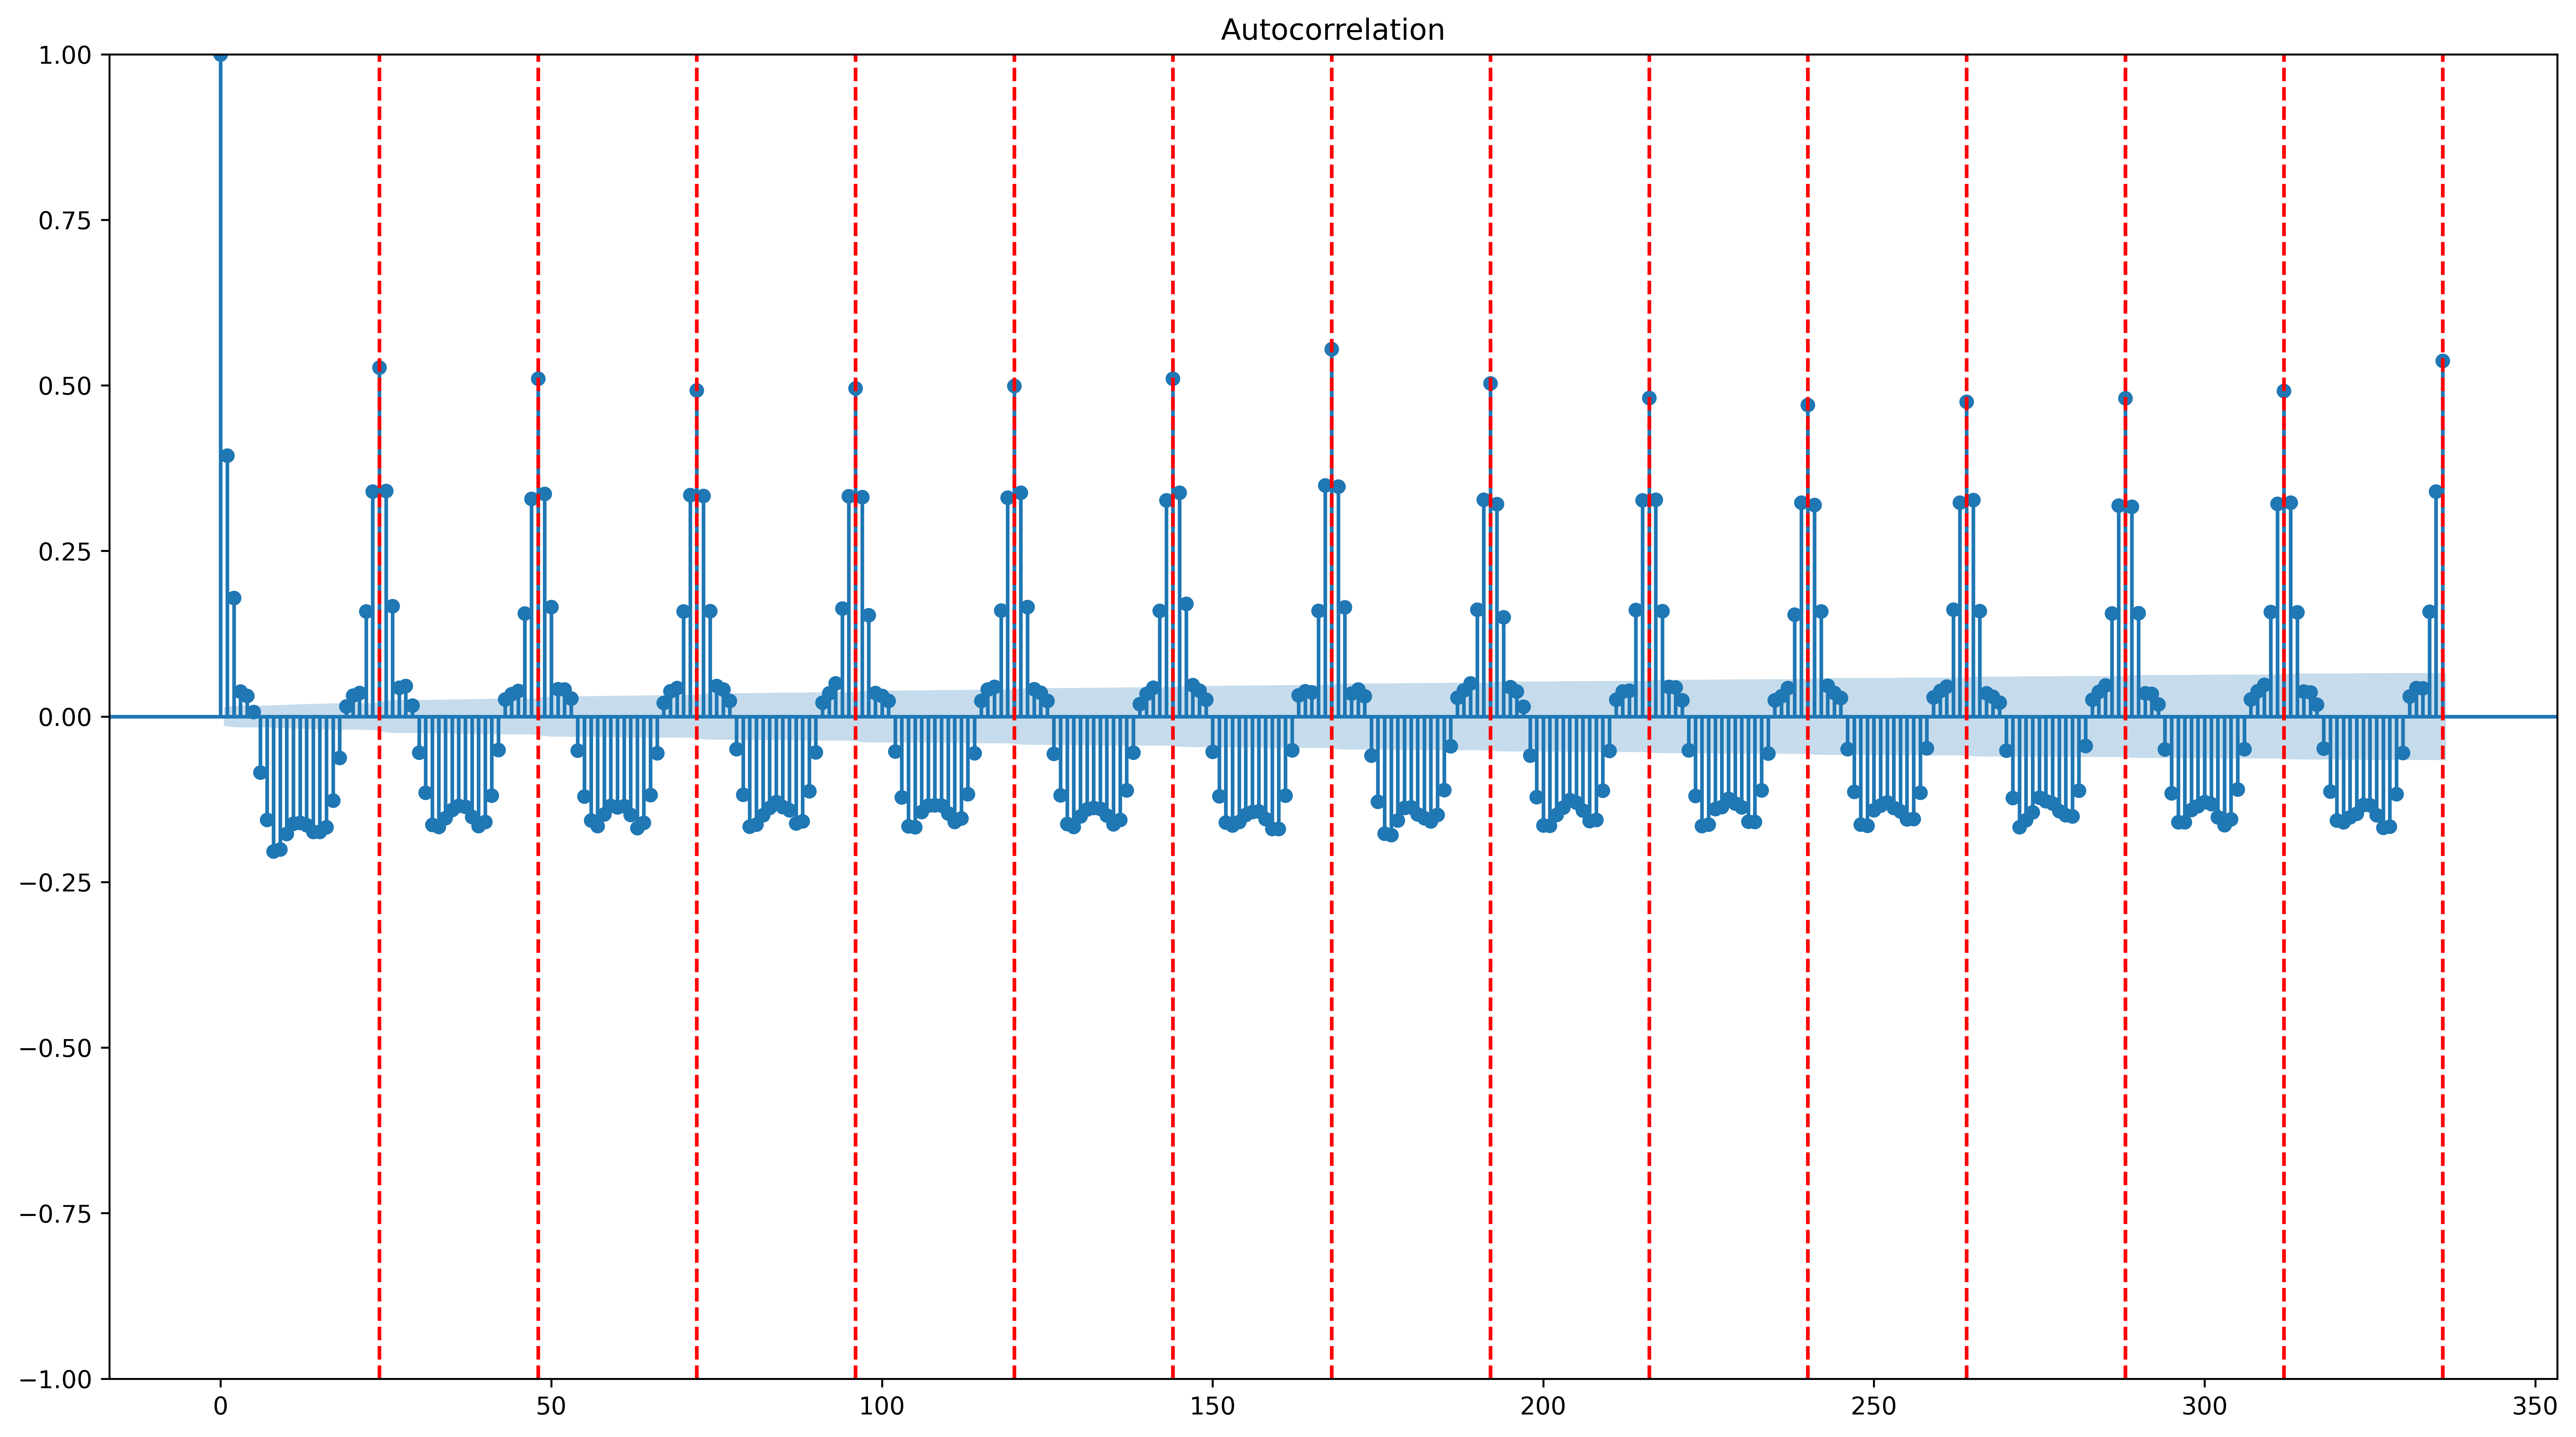

In [ ]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(18, 10), dpi=600)
sm.graphics.tsa.plot_acf(group2['ratio'], lags=14*24, ax=ax)
for i in range(1,15):
    ax.axvline(x=i*24, color='red', linestyle='--')

plt.show()

In [ ]:
group2['ratio'].to_csv('data/时间序列.csv')